In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib

In [2]:
data_dir_train = pathlib.Path('dataset/train/images/')
data_dir_test = pathlib.Path('dataset/test/images/')

In [3]:
batch_size = 64
img_height = 64
img_width = 64

In [4]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 532 files belonging to 19 classes.


In [5]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_test,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 380 files belonging to 19 classes.


In [6]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(64, 64, 64, 3)
(64,)


In [7]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [8]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [9]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

In [10]:
num_classes = 19

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 64, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0

In [13]:
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
9/9 [==============================] - 3s 347ms/step - loss: 2.9668 - accuracy: 0.0443 - val_loss: 2.9400 - val_accuracy: 0.0842
Epoch 2/20
9/9 [==============================] - 1s 112ms/step - loss: 2.9326 - accuracy: 0.1043 - val_loss: 2.9342 - val_accuracy: 0.0816
Epoch 3/20
9/9 [==============================] - 1s 110ms/step - loss: 2.9072 - accuracy: 0.1073 - val_loss: 2.9034 - val_accuracy: 0.0947
Epoch 4/20
9/9 [==============================] - 1s 121ms/step - loss: 2.8086 - accuracy: 0.2331 - val_loss: 2.8714 - val_accuracy: 0.1079
Epoch 5/20
9/9 [==============================] - 1s 119ms/step - loss: 2.6496 - accuracy: 0.1833 - val_loss: 2.9314 - val_accuracy: 0.1105
Epoch 6/20
9/9 [==============================] - 1s 112ms/step - loss: 2.5718 - accuracy: 0.2141 - val_loss: 2.8264 - val_accuracy: 0.1237
Epoch 7/20
9/9 [==============================] - 1s 119ms/step - loss: 2.2655 - accuracy: 0.3870 - val_loss: 2.9400 - val_accuracy: 0.1263
Epoch 8/20
9/9 [====

In [14]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

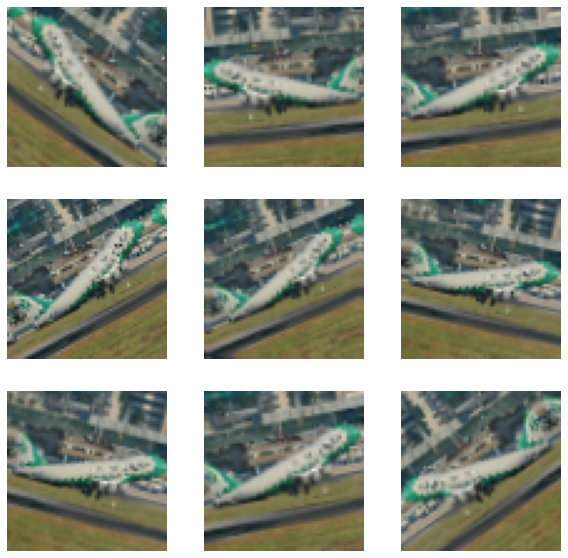

In [15]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [16]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 64, 64, 3)         0         
_________________________________________________________________
rescaling_2 (Rescaling)      (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 16)        448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)       

In [19]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
9/9 [==============================] - 2s 142ms/step - loss: 2.9905 - accuracy: 0.0461 - val_loss: 2.9412 - val_accuracy: 0.0658
Epoch 2/20
9/9 [==============================] - 1s 148ms/step - loss: 2.9414 - accuracy: 0.0712 - val_loss: 2.9401 - val_accuracy: 0.0605
Epoch 3/20
9/9 [==============================] - 1s 120ms/step - loss: 2.9395 - accuracy: 0.0855 - val_loss: 2.9319 - val_accuracy: 0.0895
Epoch 4/20
9/9 [==============================] - 1s 127ms/step - loss: 2.9252 - accuracy: 0.0872 - val_loss: 2.9107 - val_accuracy: 0.0711
Epoch 5/20
9/9 [==============================] - 1s 132ms/step - loss: 2.9063 - accuracy: 0.0686 - val_loss: 2.8703 - val_accuracy: 0.0868
Epoch 6/20
9/9 [==============================] - 1s 140ms/step - loss: 2.8551 - accuracy: 0.1017 - val_loss: 2.8529 - val_accuracy: 0.1079
Epoch 7/20
9/9 [==============================] - 1s 146ms/step - loss: 2.7897 - accuracy: 0.1118 - val_loss: 2.8274 - val_accuracy: 0.1079
Epoch 8/20
9/9 [====